# Guidelines for Prompting
In this lesson, you'll practice two prompting principles and their related tactics in order to write effective prompts for large language models.

## Setup
#### Load the API key and relevant Python libaries.

In this course, we've provided some code that loads the OpenAI API key for you.

In [29]:
import os
from dotenv import load_dotenv, find_dotenv
import requests

# Load environment variables from .env file
_ = load_dotenv(find_dotenv())

# Set the API key
api_key = os.environ['GOOGLE_API_KEY']

In [ ]:
def get_completion(prompt):
    # Set the API endpoint
    endpoint = "https://generativelanguage.googleapis.com/v1beta"
    # Prepare the request body
    request_body = {
        "contents": [
            {
                "parts": [
                    {
                        "text": prompt
                    }
                ]
            }
        ]
    }

    # Make the request to Generative Language API
    response = requests.post(
        f"{endpoint}/models/gemini-pro:generateContent?key={api_key}",
        json=request_body,
    )
    return response.json()['candidates'][0]['content']['parts'][0]['text']

    

#### helper function
Throughout this course, we will use OpenAI's `gpt-3.5-turbo` model and the [chat completions endpoint](https://platform.openai.com/docs/guides/chat). 

This helper function will make it easier to use prompts and look at the generated outputs.  
**Note**: In June 2023, OpenAI updated gpt-3.5-turbo. The results you see in the notebook may be slightly different than those in the video. Some of the prompts have also been slightly modified to product the desired results.

In [14]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [19]:
def get_completion(prompt):
    # Set the API endpoint
    endpoint = "https://generativelanguage.googleapis.com/v1beta"
    # Prepare the request body
    request_body = {
        "contents": [
            {
                "parts": [
                    {
                        "text": prompt
                    }
                ]
            }
        ]
    }

    # Make the request to Generative Language API
    response = requests.post(
        f"{endpoint}/models/gemini-pro:generateContent?key={api_key}",
        json=request_body,
    )
    return response.json()['candidates'][0]['content']['parts'][0]['text']

    

**Note:** This and all other lab notebooks of this course use OpenAI library version `0.27.0`. 

In order to use the OpenAI library version `1.0.0`, here is the code that you would use instead for the `get_completion` function:

```python
client = openai.OpenAI()

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content
```

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**

### Tactics

#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

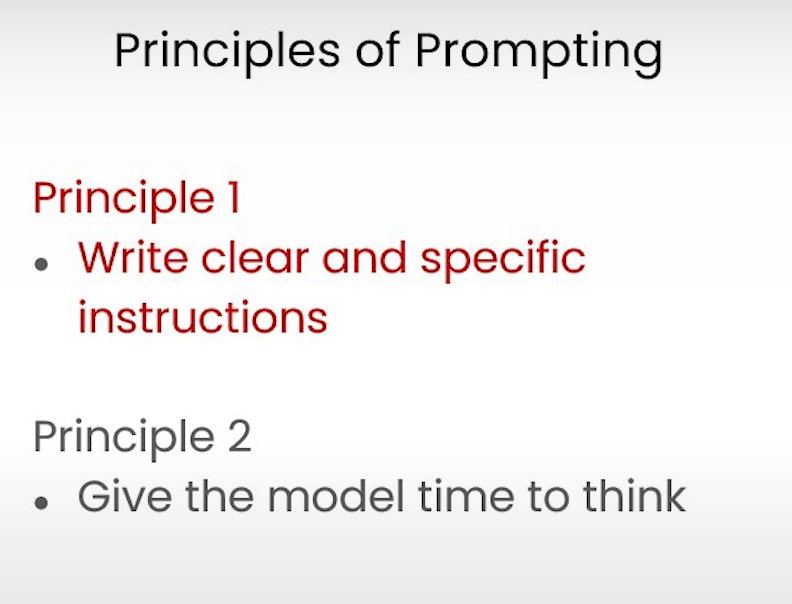

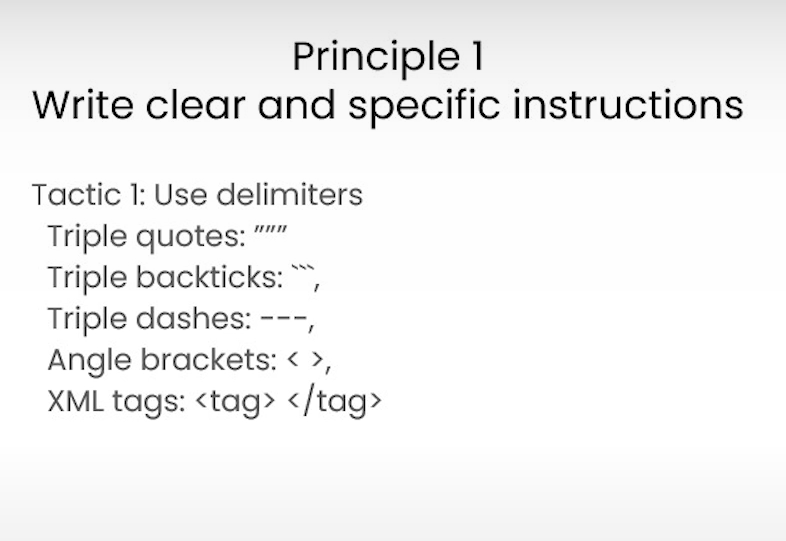

In [20]:
text = f"""
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

Provide clear and specific instructions to guide AI models toward the desired output, avoiding irrelevant or incorrect responses.


In [21]:
text = f"""
Try to enquire this model in shops,  if anyone goes to chennai trade center or abids nearby.  Please check which support 5 mega pixel, total cost expected 10500..if we het less than this quotation let's purchase there.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""
response = get_completion(prompt)
print(response)

Inquire at shops in Chennai Trade Center or Abids for a 5-megapixel camera costing approximately 10,500 rupees, and purchase it at a lower price if available.


In [7]:
text = f"""
Always nice to hear, please get back to us if you need any other assistance.
"""
prompt = f"""
Can you give 10 variations of the text delimited by triple backticks.
```{text}```
"""
response = get_completion(prompt)
print(response)

1. ```
Always nice to hear, please let us know if you require any further help.
```

2. ```
Always great to hear, feel free to reach out if you need any additional support.
```

3. ```
Always a pleasure to hear, don't hesitate to contact us if you need more help.
```

4. ```
Always good to hear, please don't hesitate to get in touch if you need any more assistance.
```

5. ```
Always wonderful to hear, please reach out if you require any further assistance.
```

6. ```
Always fantastic to hear, feel free to contact us if you need any additional help.
```

7. ```
Always a delight to hear, please let us know if you require any further assistance.
```

8. ```
Always pleasing to hear, don't hesitate to reach out if you need more help.
```

9. ```
Always satisfying to hear, please don't hesitate to contact us if you need any more assistance.
```

10. ```
Always heartwarming to hear, please reach out if you require any further help.
```


#### Tactic 2: Ask for a structured output
- JSON, HTML

In [22]:
prompt = f"""
Harper Summers crafts a heartwarming story of love and second chances in "Stars of Serenity," where two lost souls find solace and healing under the twinkling night sky of a sleepy countryside.
Provide them in JSON format with the following keys: 
book_id, title, author, genre.
"""
response = get_completion(prompt)
print(response)

```json
{
  "book_id": "1",
  "title": "Stars of Serenity",
  "author": "Harper Summers",
  "genre": "Romance"
}
```


#### Tactic 3: Ask the model to check whether conditions are satisfied

In [23]:
text_1 = f"""
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Bring water to a boil.
Step 2 - Place a tea bag in a cup.
Step 3 - Pour boiling water over the tea bag.
Step 4 - Let steep for a few minutes.
Step 5 - Remove the tea bag.
Step 6 - Add sugar or milk to taste (optional).


In [15]:
text_1 = f"""
To make Aalu Matar, heat oil, add cumin seeds, onions, garlic, and ginger. Stir in diced potatoes and 
green peas, seasoning with turmeric, coriander, cumin, and chili powder. Pour water, cover, and simmer until potatoes are tender. Garnish with cilantro and serve hot with rice or roti.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 1:")
print(response)

Completion for Text 1:
Step 1 - Heat oil in a pan.
Step 2 - Add cumin seeds, onions, garlic, and ginger.
Step 3 - Stir in diced potatoes and green peas.
Step 4 - Season with turmeric, coriander, cumin, and chili powder.
Step 5 - Pour water, cover, and simmer until potatoes are tender.
Step 6 - Garnish with cilantro and serve hot with rice or roti.


In [24]:
text_2 = f"""
The sun is shining brightly today, and the birds are \
singing. It's a beautiful day to go for a \ 
walk in the park. The flowers are blooming, and the \ 
trees are swaying gently in the breeze. People \ 
are out and about, enjoying the lovely weather. \ 
Some are having picnics, while others are playing \ 
games or simply relaxing on the grass. It's a \ 
perfect day to spend time outdoors and appreciate the \ 
beauty of nature.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
No steps provided.


In [20]:
text_2 = f"""
news highlights a breakthrough in renewable energy: scientists unveil a revolutionary solar panel design promising increased efficiency. \
Political tensions escalate as diplomatic negotiations stall between neighboring countries over territorial disputes, while health officials issue warnings about a new variant of a respiratory virus, prompting calls for increased vigilance.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"not accurate news.\"

\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
not accurate news.


In [25]:
text_2 = f"""
news highlights a breakthrough in renewable energy: scientists unveil a revolutionary solar panel design promising increased efficiency. \
Political tensions escalate as diplomatic negotiations stall between neighboring countries over territorial disputes, while health officials issue warnings about a new variant of a respiratory virus, prompting calls for increased vigilance.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …



\"\"\"{text_2}\"\"\"
"""
response = get_completion(prompt)
print("Completion for Text 2:")
print(response)

Completion for Text 2:
This text does not contain any instructions.


#### Tactic 4: "Few-shot" prompting

In [26]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""
response = get_completion(prompt)
print(response)

<grandparent>: As a young sapling endures relentless winds, \ 
its roots grow stronger with each passing storm; \ 
a mountain stream carves its path through solid rock, \ 
never ceasing in its journey toward the sea; \ 
a wounded butterfly emerges from its chrysalis, \ 
its wings painted with the beauty of its struggle.


### Principle 2: Give the model time to “think” 

#### Tactic 1: Specify the steps required to complete a task

In [27]:
text = f"""
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
**Summary:**
Two siblings, Jack and Jill, embark on an adventure to fetch water from a well, but face a mishap along the way.

**French Summary:**
Jack et Jill, deux frères et sœurs, partent à l'aventure pour aller chercher de l'eau à un puits, mais rencontrent un problème en chemin.

**Names in French Summary:**
- Jack
- Jill

**JSON Object:**
```json
{
  "french_summary": "Jack et Jill, deux frères et sœurs, partent à l'aventure pour aller chercher de l'eau à un puits, mais rencontrent un problème en chemin.",
  "num_names": 2
}
```


In [28]:
text = f"""
Sita excitedly informed Gita about a charming bookstore she had discovered nestled down the street. Intrigued, Gita expressed her love for bookstores and inquired about its name. Sita revealed it as 'Pages & Prose,' highlighting its cozy ambiance and diverse selection of books. Enthused by the description, Gita eagerly suggested visiting the bookstore over the weekend. Agreeing wholeheartedly, Sita anticipated the joy of exploring the shelves and possibly stumbling upon a new literary gem. Grateful for the recommendation, Gita thanked Sita, already looking forward to their upcoming bookish adventure.
"""
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into hindi
3 - Translate the summary into maithali
4 - translate  each name in the kannada summary.
5 - givn me the whole conversation between sita and gita in points 

Separate your answers with line breaks.

Text:
```{text}```
"""
response = get_completion(prompt_1)
print("Completion for prompt 1:")
print(response)

Completion for prompt 1:
1. Sita shared her discovery of a charming bookstore named 'Pages & Prose' with Gita, who excitedly agreed to visit it over the weekend.

2. सीता ने गीता के साथ एक आकर्षक किताबों की दुकान के बारे में बताया, जिसका नाम 'पेज एंड प्रोज' है। गीता बहुत उत्साहित हो गई और वो वीकेंड पर वहाँ जाने को राजी हो गई।

3. सीता मैथिली बोली में गीता के साथ एक आकर्षक किताबों की दूकान के बारे में कहलकी, जकर नाव होइत छै 'पेज एंड प्रोज'। गीता बहुते उत्साहित भेल आओर वीकेंड पर वहाँ जाए के मंजूर कऽने छै।

4. सीता = सीता
 गीता = गीता
 पेज एंड प्रोज = पेज एंड प्रोज

5. **सीता और गीता के बीच बातचीत:** 

* सीता: गीता, मैं आज एक बहुत अच्छी किताबों की दुकान देखी हूँ।
* गीता: वाकई? कहाँ है?
* सीता: यहीं पास में ही है। उसका नाम 'पेज & प्रोज' है।
* गीता: ओह! क्या इसमें बहुत सारी किताबें हैं?
* सीता: हाँ, बहुत सारी किताबें हैं और वो भी अलग-अलग तरह की।
* गीता: मुझे तो किताबें पढ़ना बहुत पसंद है।
* सीता: मुझे भी।
* गीता: चलो तो फिर हम इस वीकेंड वहाँ चलते हैं।
* सीता: हाँ, चलो।


#### Ask for output in a specified format

In [29]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)


Completion for prompt 2:
Summary: Sita tells Gita about a charming bookstore called 'Pages & Prose' and they plan to visit it together over the weekend.

Translation: Sita raconte à Gita un charmant librairie appelé 'Pages & Prose' et elles prévoient de le visiter ensemble ce week-end.

Names: Sita, Gita

Output JSON: 
{
  "french_summary": "Sita raconte à Gita un charmant librairie appelé 'Pages & Prose' et elles prévoient de le visiter ensemble ce week-end.",
  "num_names": 2
}


#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [11]:
prompt = f"""
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""
response = get_completion(prompt)
print(response)

The student's solution is correct. The total cost for the first year of operations as a function of the number of square feet is indeed 450x + 100,000.


#### Note that the student's solution is actually not correct.
#### We can fix this by instructing the model to work out its own solution first.

In [12]:
prompt = f"""
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""
response = get_completion(prompt)
print(response)

Total cost = Land cost + Solar panel cost + Maintenance cost
Total cost = $100x + $250x + $100,000 + $10x
Total cost = $360x + $100,000

The total cost for the first year of operations as a function of the number of square feet is $360x + $100,000.
```
Is the student's solution the same as actual solution just calculated:
```
No
```
Student grade:
```
incorrect


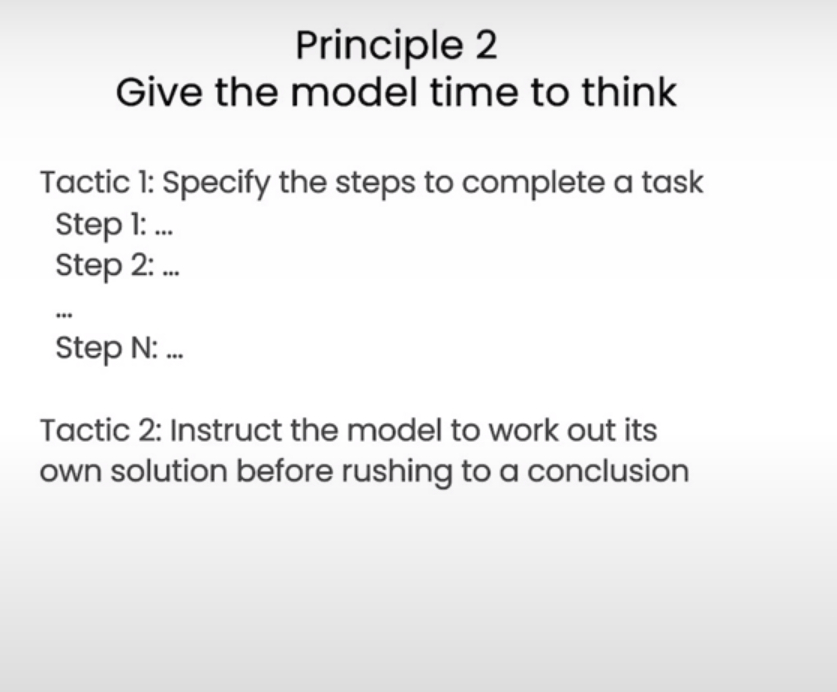

## Model Limitations: Hallucinations
- Boie is a real company, the product name is not real.

In [13]:
prompt = f"""
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""
response = get_completion(prompt)
print(response)

The AeroGlide UltraSlim Smart Toothbrush by Boie is a high-tech toothbrush designed to provide a superior cleaning experience. It features a slim and sleek design that is easy to hold and maneuver, making it perfect for those who want a comfortable and efficient brushing experience.

The toothbrush is equipped with smart technology that tracks your brushing habits and provides real-time feedback to help you improve your oral hygiene routine. It also has a built-in timer and pressure sensor to ensure that you are brushing for the recommended two minutes and applying the right amount of pressure to avoid damaging your teeth and gums.

The bristles of the AeroGlide UltraSlim Smart Toothbrush are made from a durable and hygienic material that is gentle on the teeth and gums, while still effectively removing plaque and debris. The brush head is also replaceable, making it easy to keep your toothbrush clean and sanitary.

Overall, the AeroGlide UltraSlim Smart Toothbrush by Boie is a cutting

In [14]:
import openai

# Set up your OpenAI API key
openai.api_key = 'your-api-key-goes-here'

# Define your prompt
prompt = """
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""

# Generate completion using OpenAI's GPT-3
response = openai.Completion.create(
  engine="text-davinci-002",  # Choose the engine you prefer
  prompt=prompt,
  max_tokens=100  # Adjust max tokens as needed
)

print(response.choices[0].text.strip())


AuthenticationError: Incorrect API key provided: your-api**********here. You can find your API key at https://platform.openai.com/account/api-keys.

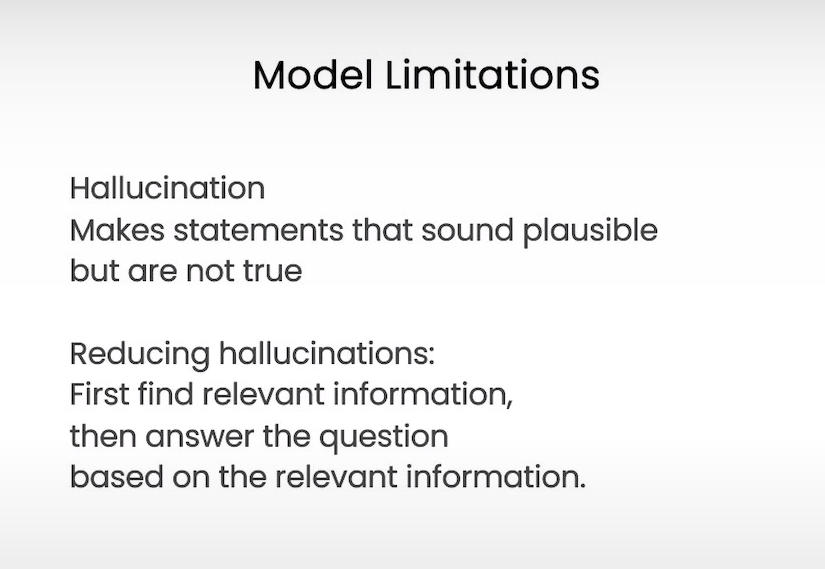

## Try experimenting on your own!

#### Notes on using the OpenAI API outside of this classroom

To install the OpenAI Python library:
```
!pip install openai
```

The library needs to be configured with your account's secret key, which is available on the [website](https://platform.openai.com/account/api-keys). 

You can either set it as the `OPENAI_API_KEY` environment variable before using the library:
 ```
 !export OPENAI_API_KEY='sk-...'
 ```

Or, set `openai.api_key` to its value:

```
import openai
openai.api_key = "sk-..."
```

#### A note about the backslash
- In the course, we are using a backslash `\` to make the text fit on the screen without inserting newline '\n' characters.
- GPT-3 isn't really affected whether you insert newline characters or not.  But when working with LLMs in general, you may consider whether newline characters in your prompt may affect the model's performance.